<a href="https://colab.research.google.com/github/vijishmadhavan/Multi_object/blob/master/Colab_Quick_Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Multi-Object Tracking of household Amenities**



Only 5 categories were included.

*   Ceiling fan
*   Lamp
*   Bed
*   Couch
*   Television


In [ ]:
#@title Download Model
%%capture
!wget model.zip https://www.dropbox.com/s/i7hmv51axx2fm03/model.zip
!unzip model.zip


It might take some time to install Libraries, Please wait....

In [ ]:
#@title Install Libs
%%capture
# install dependencies: (use cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

# Training bounding boxes (1.11G)
!wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

# Validating bounding boxes (23.94M)
!wget https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv
    
# Testing bounding boxes (73.89M)
!wget https://storage.googleapis.com/openimages/v5/test-annotations-bbox.csv

# Class names of images (11.73K)
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv


print("#### Versions: ####")
import torch, torchvision
torch.__version__
!gcc --version

In [ ]:
#@title Run Model
subset=['Ceiling fan','Lamp','Bed','Couch','Television']
subset.sort()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
import cv2
import urllib.request
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog


def make_inference(url, model_config, model_weights, threshold=0.5, n=5, save=False):
  """
  Makes inference on image (single image) using model_config, model_weights and threshold.

  Returns image with n instance predictions drawn on.

  Params:
  -------
  image (str) : file path to target image
  model_config (str) : file path to model config in .yaml format
  model_weights (str) : file path to model weights 
  threshold (float) : confidence threshold for model prediction, default 0.5
  n (int) : number of prediction instances to draw on, default 5
    Note: some images may not have 5 instances to draw on depending on threshold,
    n=5 means the top 5 instances above the threshold will be drawn on.
  save (bool) : if True will save image with predicted instances to file, default False
  """

  cfg = get_cfg()
  cfg.merge_from_file(model_config)
  cfg.MODEL.WEIGHTS = model_weights
  cfg.MODEL.SCORE_THRESH_TEST = threshold

  # Setup predictor
  predictor = DefaultPredictor(cfg)
  url_response = urllib.request.urlopen(url)
  img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
  img = cv2.imdecode(img_array, -1)  
  visualizer = Visualizer(img_rgb=img[:, :, ::-1],
                          # TODO: maybe this metadata variable could be improved?
                          metadata=MetadataCatalog.get(cfg.DATASETS.TEST[0]).set(thing_classes=subset),
                          scale=0.3)
  
  outputs = predictor(img) # Outputs: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.Instances
  # Get instance predictions from outputs
  instances = outputs["instances"]
  # Draw on predictions to image
  vis = visualizer.draw_instance_predictions(instances[:n].to("cpu"))

  # Plot the figure (display the image)
  plt.figure(figsize=(10, 10))
  plt.imshow(vis.get_image())
  plt.xticks([])
  plt.yticks([])
  # TODO: Fix saving
  #if save: plt.savefig("custom_preds/pred_"+d)
  plt.show()

It easy to try it out, Go to https://unsplash.com/s/photos/hotel-room
click on a image and let it expand. 
Right-click on the image and copy the image address and paste it below in url tab

In [ ]:
url = 'https://images.unsplash.com/photo-1595576508898-0ad5c879a061?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=667&q=80' #@param {type:"string"}


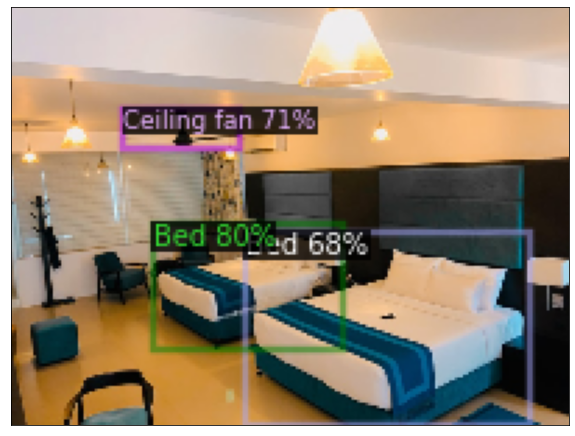

In [ ]:
#@title PREDICTION
make_inference(url=url, 
               model_config="/content/model/config (1).yaml",
               model_weights="/content/model/model_final (1).pth",
               n=4)